## 代码实践

In [23]:
import numpy as np
import scipy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('case-random forest.csv', encoding='gbk')

In [25]:
df.head()

,业务1使用次数,渠道1时长,渠道1访问次数,渠道1消费,渠道2时长,渠道2访问次数,渠道2消费,渠道3时长,渠道3访问次数,渠道3消费,渠道4时长,渠道4访问次数,渠道4消费,与客服沟通次数,isrun
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [26]:
df.isrun.nunique()

2

In [27]:
df.isrun.value_counts()

False.    2850
True.      483
Name: isrun, dtype: int64

In [28]:
df.isrun=df.isrun.astype(str).map({'False.':0, 'True.':1})

In [29]:
y=df.isrun
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isrun, dtype: int64

In [30]:
x=df.drop('isrun', axis=1)   #dataframe.drop('isrun', axis=1)
x.head()

,业务1使用次数,渠道1时长,渠道1访问次数,渠道1消费,渠道2时长,渠道2访问次数,渠道2消费,渠道3时长,渠道3访问次数,渠道3消费,渠道4时长,渠道4访问次数,渠道4消费,与客服沟通次数
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [31]:
seed=5
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=seed)
print(xtrain, ytrain)

      业务1使用次数  渠道1时长  渠道1访问次数  渠道1消费  ...  渠道4时长  渠道4访问次数  渠道4消费  与客服沟通次数
994        33  251.5      107  42.76  ...   10.4        6   2.81        3
795         0  197.0       84  33.49  ...   10.8        4   2.92        1
207         0  194.4       94  33.05  ...   10.8        5   2.92        3
1183       32  192.3       82  32.69  ...    9.0        1   2.43        2
1201       35  217.1       92  36.91  ...    8.0        5   2.16        2
...       ...    ...      ...    ...  ...    ...      ...    ...      ...
3190        0  174.7      151  29.70  ...   15.8        3   4.27        6
3046        0   18.9       92   3.21  ...   14.8        4   4.00        1
1725        0  128.8       86  21.90  ...   14.1        4   3.81        2
2254       28  202.3       97  34.39  ...    6.7        3   1.81        1
2915        0  210.1      126  35.72  ...   14.4        2   3.89        4

[2333 rows x 14 columns] 994     0
795     0
207     0
1183    0
1201    0
       ..
3190    1
3046    0
1725  

In [32]:
rfc = RandomForestClassifier()     
rfc = rfc.fit(xtrain,ytrain)       # train model 

result = rfc.score(xtest,ytest)    # get accuracy score
result

0.933

In [33]:
print ('All Trees:%s' % rfc.estimators_)

所有的树:[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1492329886, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=943634778, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_featu

In [34]:
print (rfc.classes_)
print (rfc.n_classes_)

[0 1]
2


In [35]:
print ('Predict Result: %s' % rfc.predict(xtest))
#print rfc.predict_proba(feature_test[0])

Predict Result: [0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 

In [ ]:
print ('Predict Result：%s' % rfc.predict_proba(xtest)[:,:])   #Label = 1

判定结果：[[0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.9 0.1]
 [0.8 0.2]
 [0.8 0.2]]


In [ ]:
print ('Predict Result: %s' % rfc.predict_proba(xtest)[:,1])   #Label = 1

判定结果：[0.1 0.  0.  0.1 0.1 0.8 0.9 0.4 0.  0.4 0.  0.  0.9 0.  0.5 0.  0.  0.
 0.2 0.2 0.  0.  0.  0.  0.2 0.1 0.  0.3 0.  0.1 0.1 0.1 0.1 0.  0.  0.
 0.  1.  0.  0.  0.  0.  0.1 0.  0.1 0.1 0.  0.  0.  0.1 0.3 0.2 0.  0.3
 0.  0.  0.1 0.  0.3 0.  0.  0.  0.5 0.  0.1 0.3 0.1 0.6 0.9 0.6 0.  0.1
 0.2 0.1 0.4 0.3 0.1 0.  0.  0.2 0.1 0.  0.  0.  0.  0.7 0.  0.  0.2 0.2
 0.1 0.  0.  0.  0.1 0.7 0.7 0.  0.  0.3 0.4 0.1 0.  0.1 0.4 0.1 0.1 0.4
 0.1 0.4 0.  0.4 0.2 0.  0.  0.2 0.  0.1 0.2 0.  0.1 0.  0.2 0.  0.  0.4
 0.  0.9 0.  0.1 0.1 0.  0.7 0.1 0.2 0.5 0.3 0.3 0.1 0.1 0.1 0.2 0.  0.
 0.5 0.2 0.4 0.  0.  0.1 0.3 0.3 0.  0.2 1.  0.  0.1 0.2 0.  0.1 0.1 0.1
 0.9 0.3 0.1 0.3 0.6 0.2 0.1 0.3 0.1 0.9 0.  0.  0.4 0.  0.  0.  0.  0.1
 0.1 0.1 0.  0.3 0.2 0.  0.  0.  0.  0.2 0.  0.1 0.  0.1 0.1 0.2 0.4 0.
 0.1 0.  0.  0.  0.2 0.  0.1 0.  0.  0.2 0.  0.8 0.  0.1 0.2 0.2 0.4 0.1
 0.3 0.1 0.2 0.  0.1 0.1 0.1 0.7 0.  0.  0.  0.4 0.7 0.  0.4 0.5 0.  0.1
 0.  0.  0.3 0.  0.  0.  0.1 0.1 0.1 0.  0.2 0.1 0

In [ ]:
d1=np.array(pd.Series(rfc.predict_proba(xtest)[:,1]>0.5).map({False:0, True:1}))
d2=rfc.predict(xtest)
np.array_equal(d1,d2)

True

In [ ]:
roc_auc_score(ytest, rfc.predict_proba(xtest)[:,1])

0.8955312159586056

In [36]:
print ('feature"s importance：%s' % rfc.feature_importances_)

feature"s importance：[0.03951219 0.14936542 0.04820619 0.15508832 0.08328351 0.04553928
 0.08070048 0.05505552 0.04683535 0.05577059 0.04574582 0.03273807
 0.04631207 0.11584719]


Feature ranking:
 1) 渠道1时长                          0.183430
 2) 渠道1消费                          0.132671
 3) 与客服沟通次数                        0.119321
 4) 渠道2消费                          0.077602
 5) 渠道2时长                          0.071876
 6) 渠道3消费                          0.060257
 7) 渠道3时长                          0.059892
 8) 渠道4时长                          0.050479
 9) 渠道3访问次数                        0.045915
10) 渠道1访问次数                        0.043348
11) 渠道4消费                          0.040957
12) 渠道2访问次数                        0.039809
13) 渠道4访问次数                        0.037313
14) 业务1使用次数                        0.037130


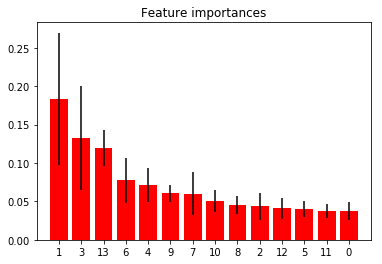

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]# Print the feature ranking
print("Feature ranking:")
for f in range(min(20,xtrain.shape[1])):    
    print("%2d) %-*s %f" % (f + 1, 30, xtrain.columns[indices[f]], importances[indices[f]]))# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xtrain.shape[1]), importances[indices],  color="r", yerr=std[indices], align="center")
plt.xticks(range(xtrain.shape[1]), indices)
plt.xlim([-1, xtrain.shape[1]])
plt.show()

In [ ]:
tuple(xtrain.columns[indices])

('渠道1时长',
 '渠道1消费',
 '与客服沟通次数',
 '渠道2消费',
 '渠道2时长',
 '渠道3消费',
 '渠道3时长',
 '渠道4时长',
 '渠道3访问次数',
 '渠道1访问次数',
 '渠道4消费',
 '渠道2访问次数',
 '渠道4访问次数',
 '业务1使用次数')

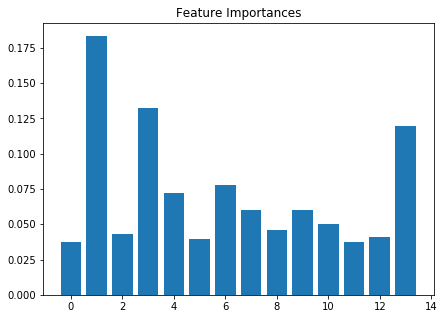

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
ax.set_title("Feature Importances")
plt.show()

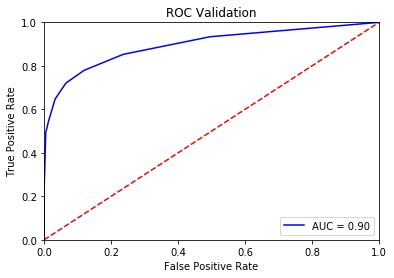

In [ ]:
predictions_validation = rfc.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, predictions_validation)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, xtrain, ytrain)
print(scores.mean())                             

clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf2, xtrain, ytrain)
print(scores.mean())                             

C:\Users\reina\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\reina\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8589856841784863
0.8967035342356681


In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
param_test1 = {'n_estimators': range(25,500,25)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100, 
                                                           min_samples_leaf=20,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc', 
                        cv=5)
gsearch1.fit(xtrain, ytrain)
print(gsearch1.best_params_, gsearch1.best_score_)
#gsearch1.cv_results_print result)

{'n_estimators': 300} 0.8376467254535471


In [ ]:
param_test2 = {'min_samples_split':range(60, 200, 20), 'min_samples_leaf':range(10, 110, 10)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           max_depth=8, random_state=10), 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        cv=5)
gsearch2.fit(xtrain,ytrain)
print(gsearch2.best_params_, gsearch2.best_score_)

{'min_samples_leaf': 10, 'min_samples_split': 60} 0.8457901256625079


In [ ]:
param_test3 = {'max_depth':range(3, 30, 2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        cv=5)
gsearch3.fit(xtrain,ytrain)
print(gsearch3.best_params_, gsearch3.best_score_)

{'max_depth': 7} 0.8483144059119456


In [ ]:
roc_auc_score(ytest, gsearch3.best_estimator_.predict_proba(xtest)[:,1])

0.9071946486928104

In [ ]:
gsearch3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
param_test4 = {'criterion':['gini', 'entropy'], 'class_weight':[None, 'balanced']}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=300,
                                                           max_depth=7, 
                                                           min_samples_split=60, 
                                                           min_samples_leaf=10,
                                                           random_state=10), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        cv=5)
gsearch4.fit(xtrain,ytrain)
print(gsearch4.best_params_, gsearch4.best_score_)

{'class_weight': None, 'criterion': 'entropy'} 0.8487282683455074


In [ ]:
roc_auc_score(ytest, gsearch4.best_estimator_.predict_proba(xtest)[:,1])

0.908275462962963